### 【[周末影音解盤](https://www.facebook.com/kevinyang20180801/videos/2441453296065011/)】中期偏多，留意瑕疵  
加權指數短中期偏多，但要留意多方哪四個瑕疵？  
櫃買指數相對偏弱，未來多空走勢，要觀察哪三個技術面工具？  
市場觀望氣氛濃厚，有哪些類股仍偏多表現？  
完整內容請參考影音解盤~  
https://www.facebook.com/kevinyang20180801/videos/2441453296065011  

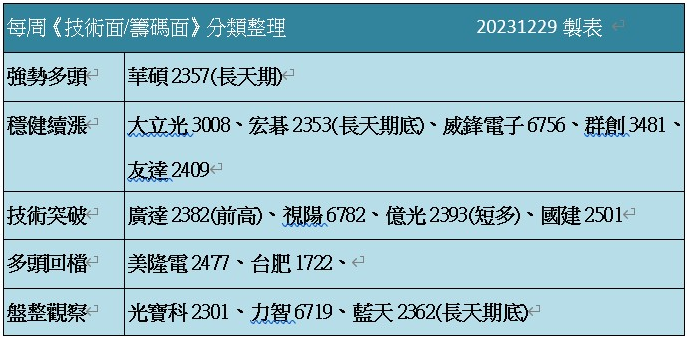  
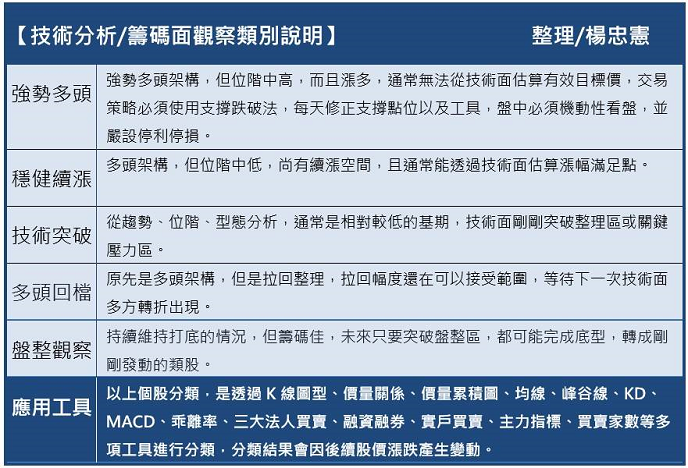  

### 本日進度  
* 追蹤觀察：亞航(2630)  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

In [2]:
# 均線趨勢判定程序
def moving_average_trend(sma):
    now_sma  = sma.iloc[-1].to_dict()
    prev_sma = sma.iloc[-2].to_dict()
    # 確認均線方向：↑ : 'u' , ↓ : 'd' , ＝ : '='
    sma5_dir = 'u' if now_sma['SMA5'] > prev_sma['SMA5'] else 'd' if now_sma['SMA5'] < prev_sma['SMA5'] else '='
    sma10_dir = 'u' if now_sma['SMA10'] > prev_sma['SMA10'] else 'd' if now_sma['SMA10'] < prev_sma['SMA10'] else '='
    sma20_dir = 'u' if now_sma['SMA20'] > prev_sma['SMA20'] else 'd' if now_sma['SMA20'] < prev_sma['SMA20'] else '='
    sma60_dir = 'u' if now_sma['SMA60'] > prev_sma['SMA60'] else 'd' if now_sma['SMA60'] < prev_sma['SMA60'] else '='
    sma120_dir = 'u' if now_sma['SMA120'] > prev_sma['SMA120'] else 'd' if now_sma['SMA120'] < prev_sma['SMA120'] else '='
    sma240_dir = 'u' if now_sma['SMA240'] > prev_sma['SMA240'] else 'd' if now_sma['SMA240'] < prev_sma['SMA240'] else '='
    # 短期趨勢
    if sma5_dir == sma10_dir :
        if sma5_dir == 'u' :
            print('短期趨勢：上升')
        elif sma5_dir == 'd' :
            print('短期趨勢：下降')
    else :
        print('短期趨勢：盤整')
    # 中期趨勢
    if sma20_dir == sma60_dir :
        if sma20_dir == 'u' :
            print('中期趨勢：上升')
        elif sma20_dir == 'd' :
            print('中期趨勢：下降')
    else :
        print('中期趨勢：盤整')
    # 長期趨勢
    if sma120_dir == sma240_dir :
        if sma120_dir == 'u' :
            print('長期趨勢：上升')
        elif sma120_dir == 'd' :
            print('長期趨勢：下降')
    else :
        print('長期趨勢：盤整')

In [3]:
##### 使用2023年6月13日到2023年12月29日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('./data/SINO_2630_240101.xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

In [4]:
# 設定（預估）頸線 – 型態尚未成立
neckline_start_date = '2023-07-13'
neckline_end_date = df_k_line.iloc[-1].name.strftime("%Y-%m-%d")
neckline_price = df_k_line.loc['2023-09-13']['Open']

# 估算目標價
bottom_price_date = '2023-11-01'
bottom_price = df_k_line.loc[bottom_price_date]['Close']
target_price = (neckline_price - bottom_price) + neckline_price
print('（預估）頸線價格 ＝ {:.2f}元 ， 底部最低價格 ＝ {:.2f}元 ； 估算目標價 ＝ {:.2f}元'.format(neckline_price,bottom_price,target_price))

（預估）頸線價格 ＝ 44.00元 ， 底部最低價格 ＝ 31.00元 ； 估算目標價 ＝ 57.00元


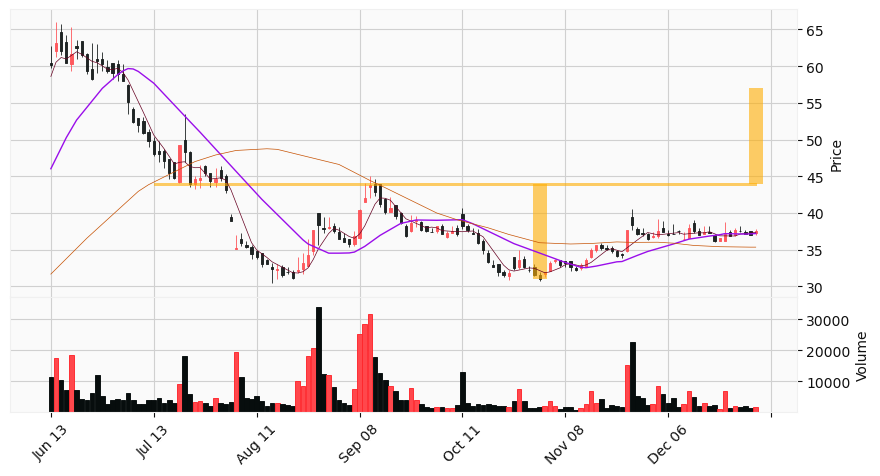

短期趨勢：上升
中期趨勢：盤整
長期趨勢：盤整


In [5]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定頸線
seq_of_seq_of_points=[
    [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
    [(bottom_price_date,bottom_price),(bottom_price_date,neckline_price)],
    [(neckline_end_date,neckline_price),(neckline_end_date,target_price)]
                     ]

# 設定均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.5,color='xkcd:maroon'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=1.0,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.5,color='xkcd:dark orange')
    
            }

# 繪製K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), volume=True,addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=(1.0,10,10), colors='xkcd:orange yellow', alpha=0.6), warn_too_much_data=1000)
mpf.plot(df_k_line,**kwargs)

# 均線趨勢判定
moving_average_trend(df_sma)

* 追蹤觀察：美隆電(2477)

In [6]:
##### 使用2022年3月17日到2023年12月29日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('./data/SINO_2477_240101.xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

,Date,Price,Type
DateIndex,,,
1,2022-03-18,34.60,HI
37,2022-05-12,23.90,LO
57,2022-06-10,25.65,HI
79,2022-07-12,18.95,LO
107,2022-08-19,21.60,HI
153,2022-10-26,16.30,LO
174,2022-12-05,21.00,HI
219,2023-02-17,19.95,LO
224,2023-02-24,22.50,HI


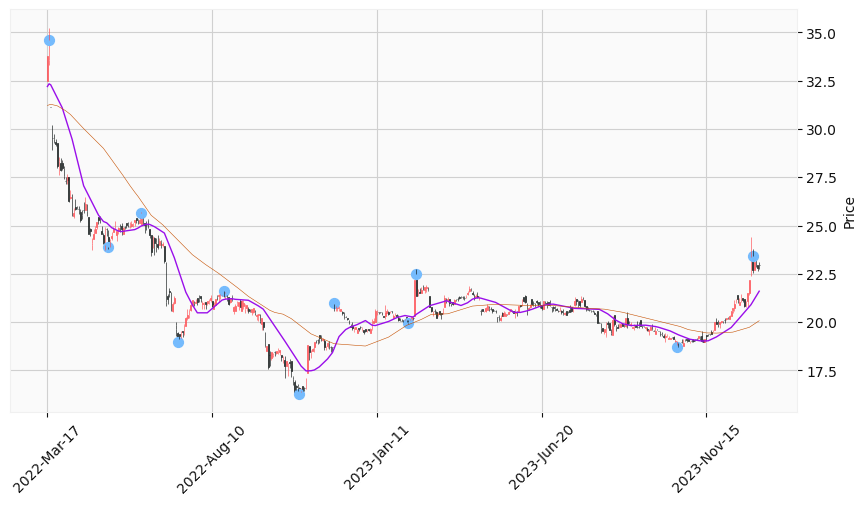

In [7]:
import myutils

# 尋找轉折點
_,_,max_min = myutils.FindingTurningPoints(df_k_line,'open_close',order=20)

# 顯示轉折點
display(max_min)

# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定均線與轉折點    
turning_points_len = len(np.array(df_k_line['Close']))
turning_points = np.array([np.nan]*turning_points_len)
for point in max_min.iterrows() :
    turning_points[point[0]] = point[1]['Price']    
apds = [
    mpf.make_addplot(turning_points,type='scatter',marker='o',markersize=50,color='xkcd:sky blue'),
    mpf.make_addplot(df_sma['SMA20'],width=1.0,color='xkcd:violet'),
    mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:dark orange')
]

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=apds)
mpf.plot(df_k_line,**kwargs)

In [8]:
# 設定頸線
neckline_start_date = '2022-06-20'
neckline_end_date = df_k_line.iloc[-1].name.strftime("%Y-%m-%d")
neckline_price = df_k_line.loc['2023-02-24']['Open']

# 估算目標價
bottom_price_date = '2023-10-20'
bottom_price = df_k_line.loc[bottom_price_date]['Open']
target_price = (neckline_price - bottom_price) + neckline_price
print('頸線價格 ＝ {:.2f}元 ， 底部最低價格 ＝ {:.2f}元 ； 估算目標價 ＝ {:.2f}元'.format(neckline_price,bottom_price,target_price))

頸線價格 ＝ 22.50元 ， 底部最低價格 ＝ 18.70元 ； 估算目標價 ＝ 26.30元


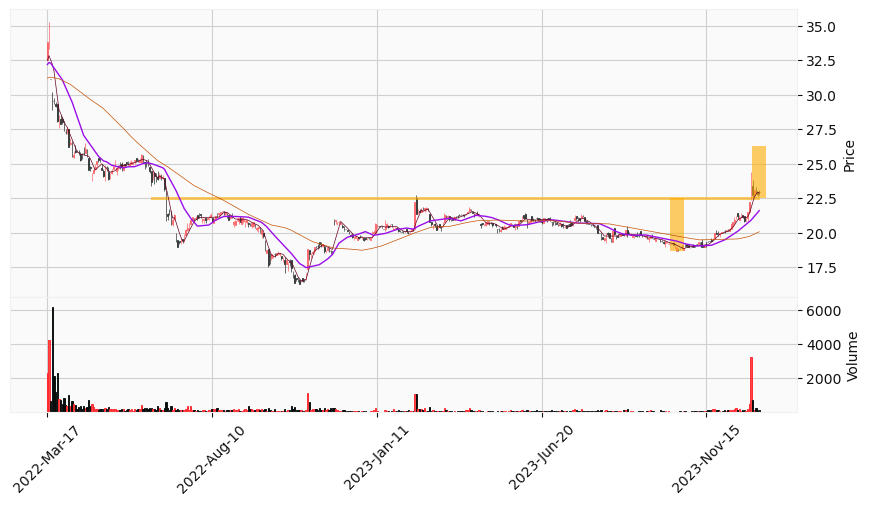

短期趨勢：盤整
中期趨勢：上升
長期趨勢：上升


In [9]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定頸線
seq_of_seq_of_points=[
    [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
    [(bottom_price_date,bottom_price),(bottom_price_date,neckline_price)],
    [(neckline_end_date,neckline_price),(neckline_end_date,target_price)]
                     ]

# 設定均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.5,color='xkcd:maroon'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=1.0,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.5,color='xkcd:dark orange')
    
            }

# 繪製K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), volume=True,addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=(1.0,10,10), colors='xkcd:orange yellow', alpha=0.6), warn_too_much_data=1000)
mpf.plot(df_k_line,**kwargs)

# 均線趨勢判定
moving_average_trend(df_sma)

* 追蹤觀察：國建(2501)

In [10]:
##### 使用2021年7月28日到2023年12月29日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('./data/SINO_2501_240101.xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

In [11]:
# 設定頸線
neckline_start_date = '2022-06-02'
neckline_end_date = df_k_line.iloc[-1].name.strftime("%Y-%m-%d")
neckline_price = df_k_line.loc['2023-03-09']['Open']

# 估算目標價
bottom_price_date = '2022-11-03'
bottom_price = df_k_line.loc[bottom_price_date]['Close']
target_price = (neckline_price - bottom_price) + neckline_price
print('頸線價格 ＝ {:.2f}元 ， 底部最低價格 ＝ {:.2f}元 ； 估算目標價 ＝ {:.2f}元'.format(neckline_price,bottom_price,target_price))

頸線價格 ＝ 17.70元 ， 底部最低價格 ＝ 14.50元 ； 估算目標價 ＝ 20.90元


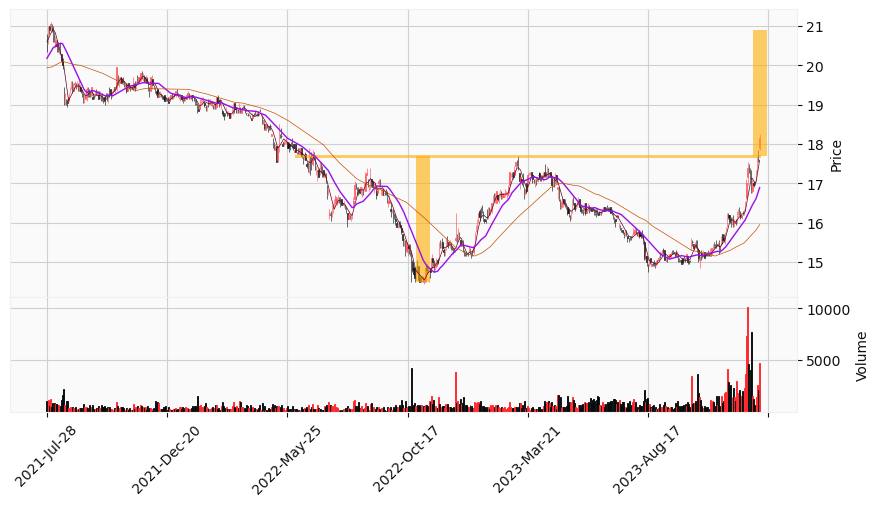

短期趨勢：上升
中期趨勢：上升
長期趨勢：上升


In [12]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定頸線
seq_of_seq_of_points=[
    [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
    [(bottom_price_date,bottom_price),(bottom_price_date,neckline_price)],
    [(neckline_end_date,neckline_price),(neckline_end_date,target_price)]
                     ]

# 設定均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.5,color='xkcd:maroon'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=1.0,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.5,color='xkcd:dark orange')
    
            }

# 繪製K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), volume=True,addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=(1.0,10,10), colors='xkcd:orange yellow', alpha=0.6), warn_too_much_data=1000)
mpf.plot(df_k_line,**kwargs)

# 均線趨勢判定
moving_average_trend(df_sma)